Cloning the repository.

In [56]:
!apt-get install git
!git config --global user.email "mona.mahmoodi@gmail.com"
!git config --global user.name "mona1378"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [57]:
!git clone https://github.com/Pivotal-Life-Sciences-DS/mona_takehome

Cloning into 'mona_takehome'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 866.69 KiB | 10.32 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [58]:
%cd mona_takehome/

/content/mona_takehome/mona_takehome/mona_takehome


Reading the Reddit r/askscience data.

In [59]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('askscience_data.csv', delimiter=',')

# Display the first few rows to understand the structure
print(df.head())
print(df.shape)
df.describe()

   Unnamed: 0                                              title  \
0           0  Post viral cough: why does it get worse after ...   
1           1  Can an x-ray of an adult show chronic malnouri...   
2           2           [META] Bots and AI tools on r/askscience   
3           3     Can you predictably manipulate a magnetic gas?   
4           4  Are there cells in humans (or other mammals) t...   

                                                body         tag  \
0  Tl;dr: why is your cough during an upper respi...  Human Body   
1  If a person was chronically undernourished thr...  Human Body   
2   \n\nOver the past few days we have seen a sur...        META   
3  Does there exist a gas that changes in respons...     Physics   
4                                                NaN    Medicine   

              datetime                author   score  upvote_ratio  \
0  2022-12-09 02:52:07    CarboniferousCreek  1343.0          0.93   
1  2022-12-08 18:28:51  Foxs-In-A-Trenchco

,Unnamed: 0,score,upvote_ratio
count,4205.000000,4205.000000,4205.000000
mean,1404.249703,3730.471106,0.765719
std,815.521641,5577.606541,0.177537
min,0.000000,0.000000,0.170000
25%,676.000000,4.000000,0.590000
50%,1491.000000,35.000000,0.840000
75%,2136.000000,7472.000000,0.920000
max,2735.000000,83382.000000,1.000000


### Task 1

Determine the attributes of a successful post on r/askscience


If I understand the task correctly, the success metrics are:
* Score: # upvotes - # downvotes
* upvote_ratio: # upvotes / (# upvotes + # downvotes)

So, any attribute(s combination) that has positive correlation with score or upvote_ratio, could be representative of the success and any attribute that is reversely correlated is also inversely impacts the success. For example, based on the analysis below, length of the post body is inversely contibuting to success. Social sciences tag is correlated with high scores (success)...


First analysing each attribute relation with score.
* Title length doesn't seem to be correlated with score. In task 2, we'll see other aspects of title relation with the score based on text analysis.
* Higher body length seems to bring down the score. Again more text analsis based model in task 2 can give more clue about it.
* Social sciences tag seem to be getting really high scores compared to other tags.
* Looked at hour of the day instead of the whole date vs score as possibly the exact date doesn't matter and hours 3-8 seem to have a higher score average compared to other hours. A nice analysis could also be week of the day, or month, and finding those correlation with score or combined with other attributes.
* upvote_ratio has a high correlation with score, as expected.

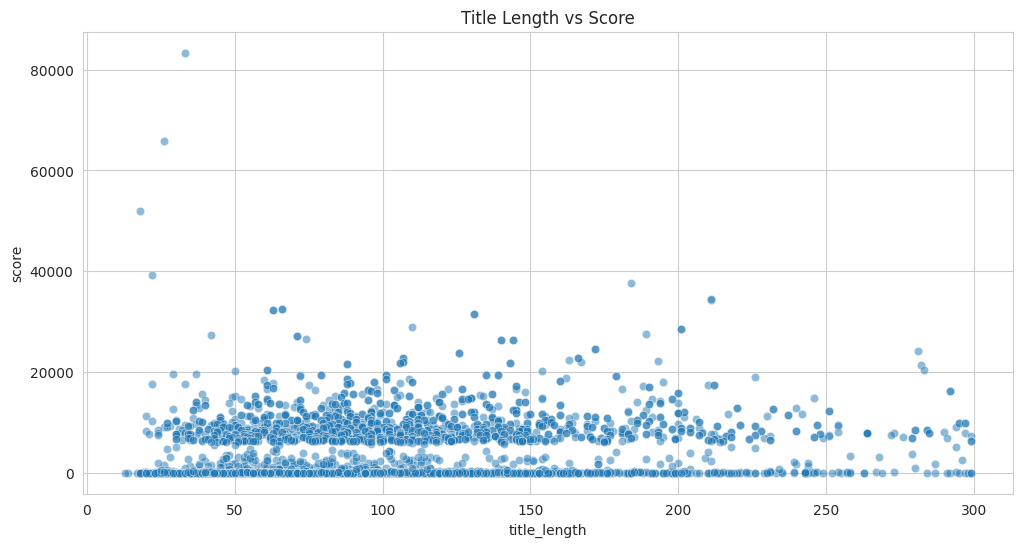

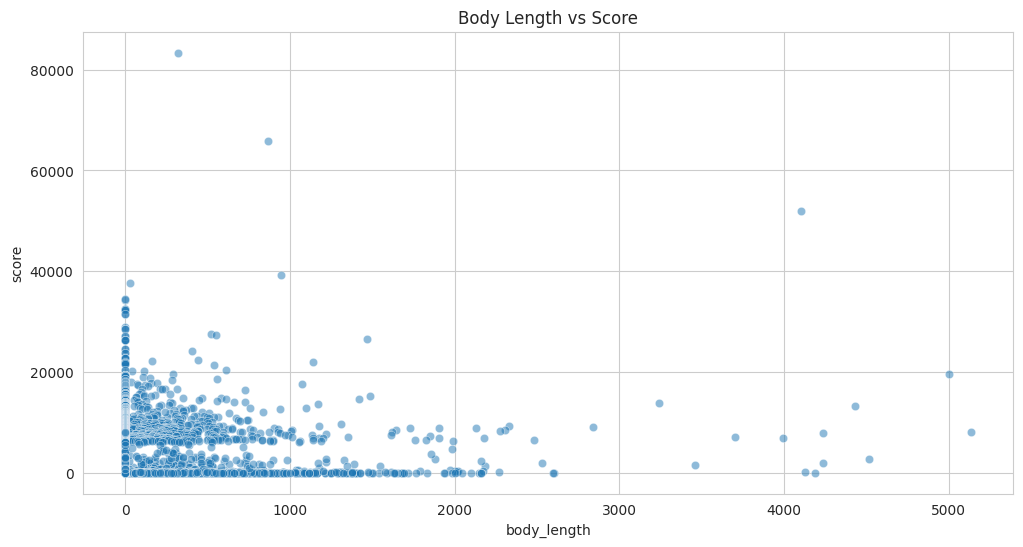

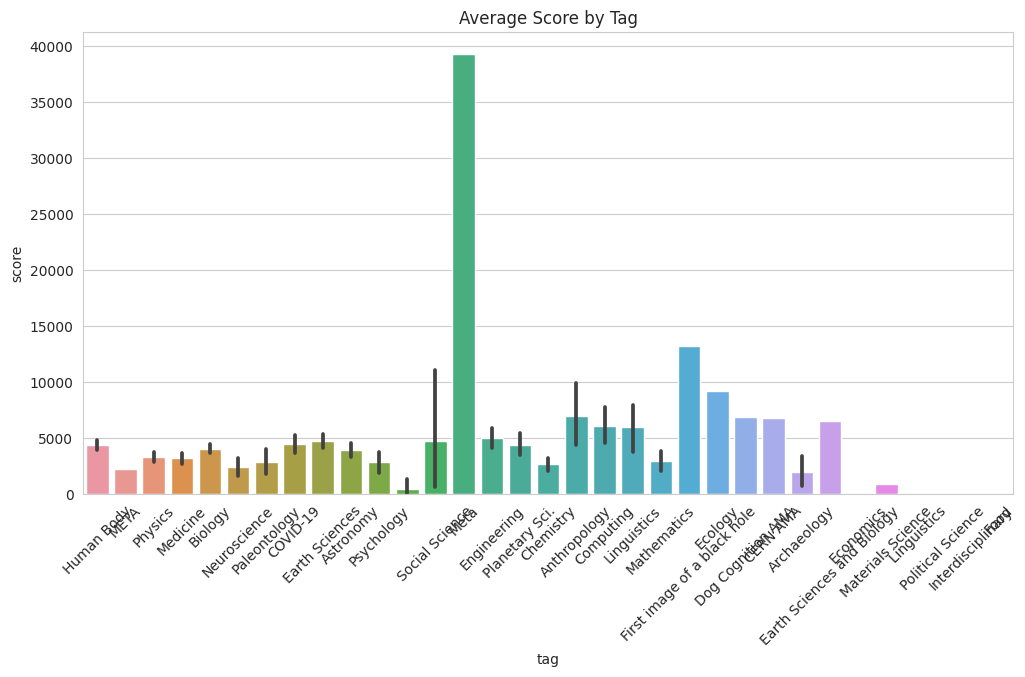

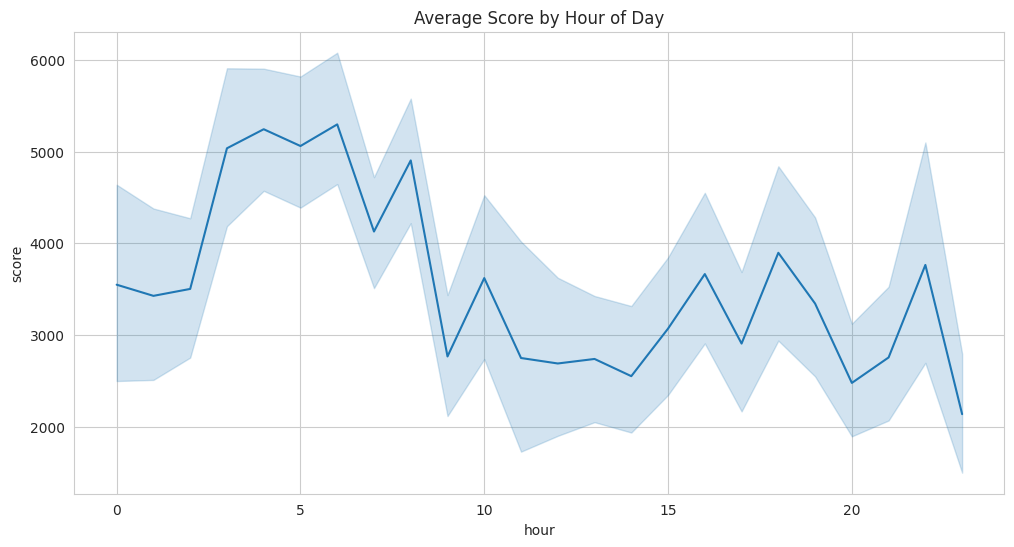

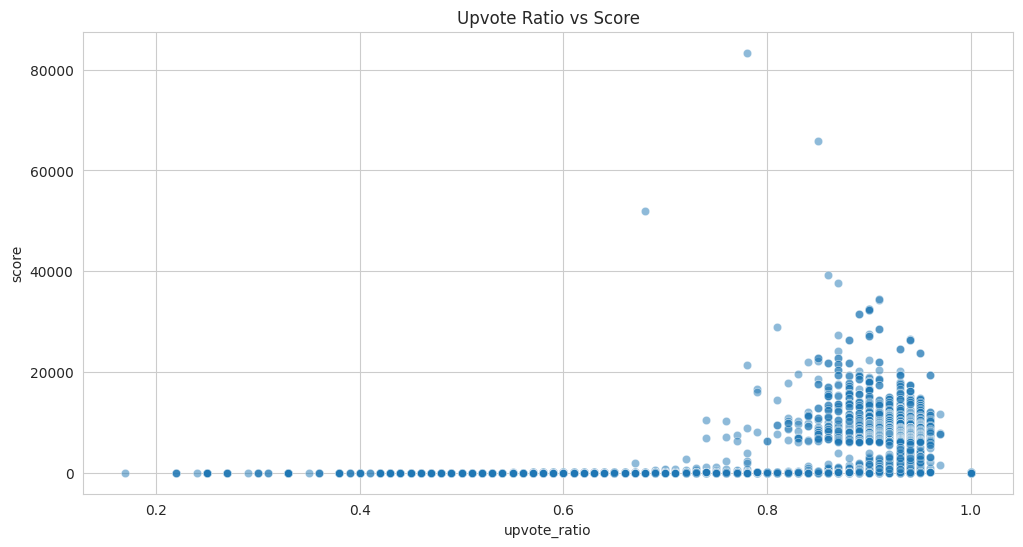

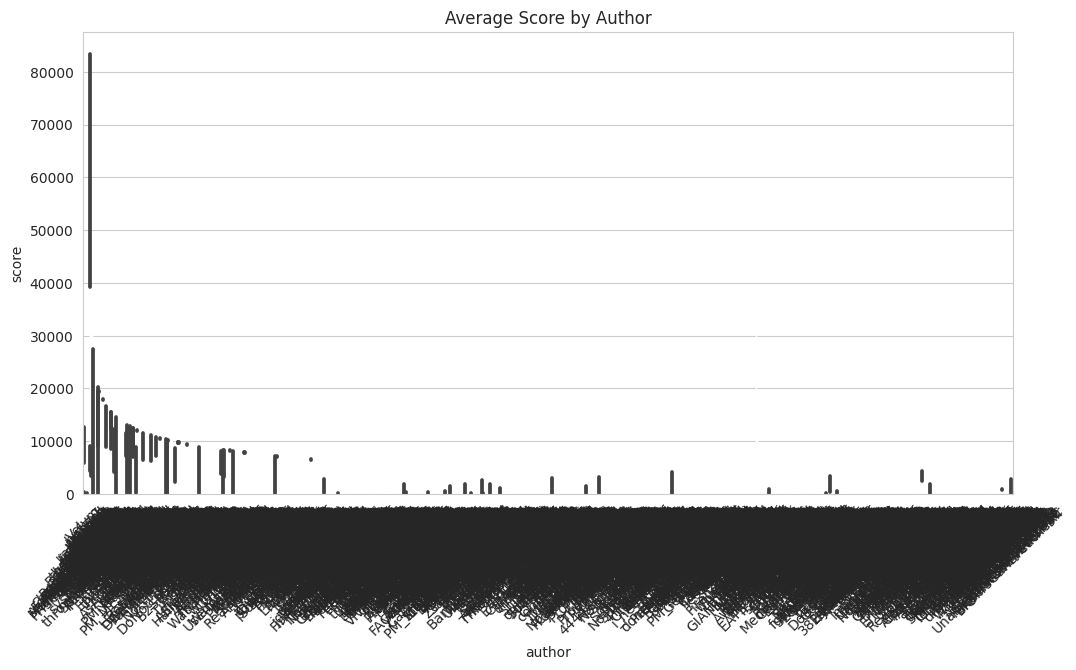

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# This was added to errors in the later stages because of NA values
for column in ['title', 'body', 'author', 'tag']:
  # Fill missing values with empty strings
  df[column].fillna('', inplace=True)

  # Convert columns to string type just to be safe
  df[column] = df[column].astype(str)

# 1. Title & Body length vs Score
df['title_length'] = df['title'].apply(len)
df['body_length'] = df['body'].apply(len)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='title_length', y='score', alpha=0.5)
plt.title("Title Length vs Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='body_length', y='score', alpha=0.5)
plt.title("Body Length vs Score")
plt.show()

# 2. Average Score vs Tag
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='tag', y='score', estimator=np.mean)
plt.title("Average Score by Tag")
plt.xticks(rotation=45)
plt.show()

# 3. Datetime (assuming it's already in datetime format)
# Convert the 'datetime' column to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='score', estimator=np.mean)
plt.title("Average Score by Hour of Day")
plt.show()

# 5. Upvote Ratio vs Score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='upvote_ratio', y='score', alpha=0.5)
plt.title("Upvote Ratio vs Score")
plt.show()


Heatmap of Correlations:
* Score has high correlation with upvote_ratio
* Score and upvote_ratio both have negative one with body length and very small with title length

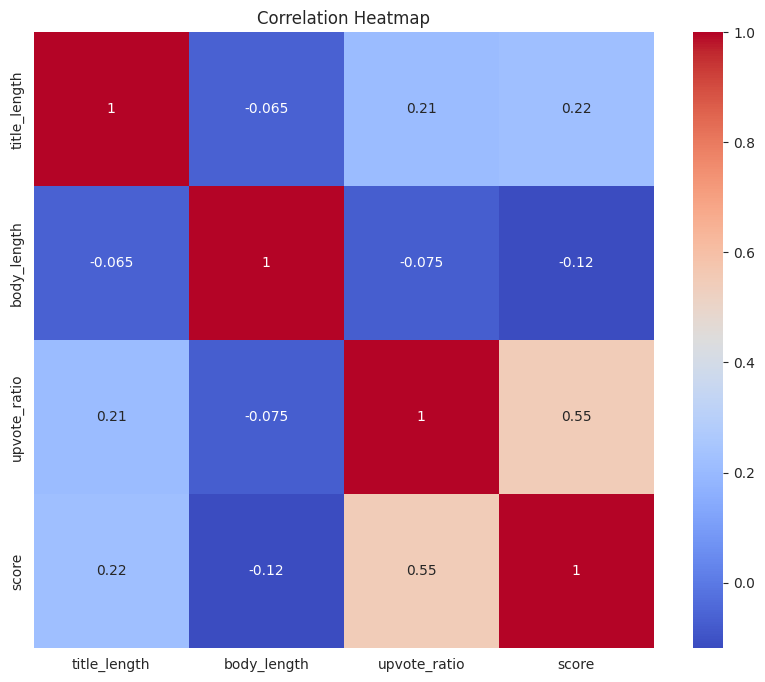

In [61]:
correlation_matrix = df[['title_length', 'body_length', 'upvote_ratio', 'score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Interaction Plot: (can be tested on other pairs as well)
Some tags seem to have a much higher score at certain hours so we analyse which ones have average score of higher than 10000 to understand better and here are the results which can be farther analyzed to find the root cause. But, this combinations of tag and hour can be correlated with success.

It's important to analyse farther to find the reason as it could be also related to data sampling issues (batch effect) or other biases that are added to the data and not a real trend in the data.

                             tag  hour         score

                    Anthropology     7  14560.000000

                    Anthropology     8  21975.000000

                    Anthropology     9  11013.333333

                        COVID-19    18  10881.250000

                        COVID-19    22  12650.000000

                       Computing     0  12617.000000

                       Computing     6  16141.500000

                       Computing     7  11315.800000

                  Earth Sciences    16  10115.900000

     First image of a black hole     4  13233.000000

                     Linguistics     4  11161.666667

                     Linguistics     6  11357.500000

                            Meta    19  39288.000000

                  Social Science    10  36904.000000


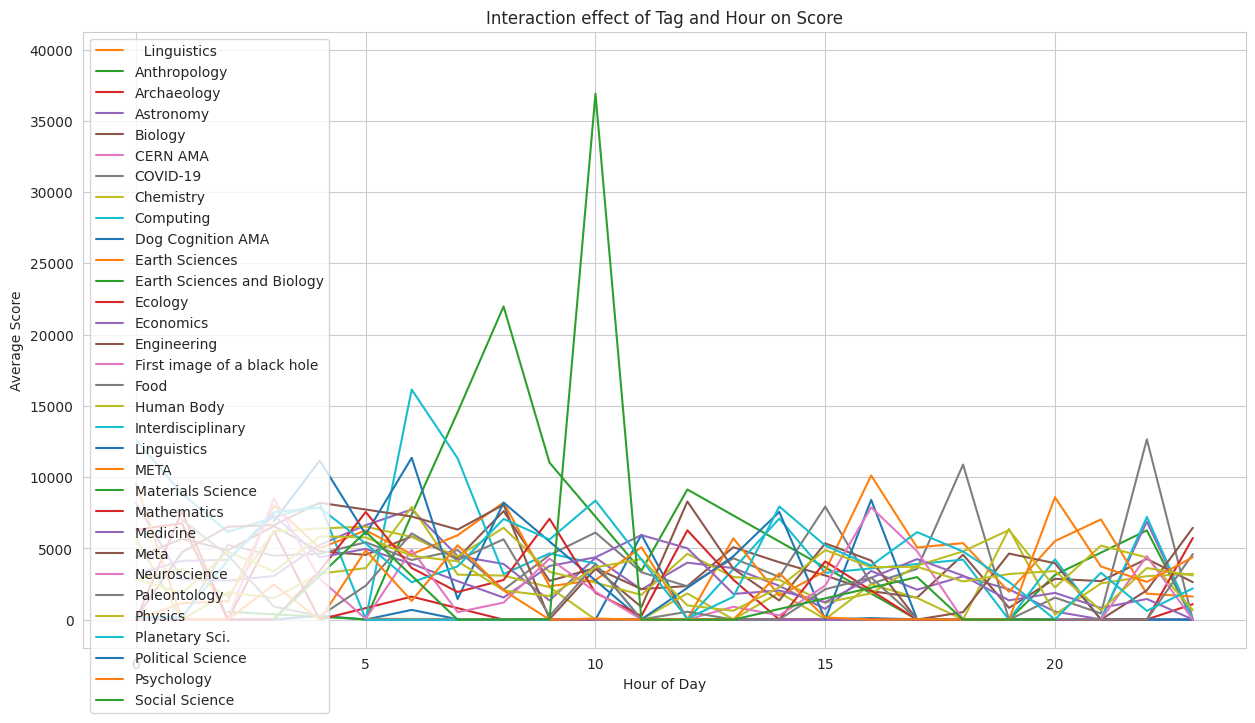

                             tag  hour         score
29                  Anthropology     7  14560.000000
30                  Anthropology     8  21975.000000
31                  Anthropology     9  11013.333333
117                     COVID-19    18  10881.250000
121                     COVID-19    22  12650.000000
147                    Computing     0  12617.000000
152                    Computing     6  16141.500000
153                    Computing     7  11315.800000
184               Earth Sciences    16  10115.900000
226  First image of a black hole     4  13233.000000
256                  Linguistics     4  11161.666667
258                  Linguistics     6  11357.500000
319                         Meta    19  39288.000000
441               Social Science    10  36904.000000


In [62]:
# Assuming you've already created the 'hour' column as before
interaction_data = df.groupby(['tag', 'hour'])['score'].mean().reset_index()

plt.figure(figsize=(15, 8))
for tag in interaction_data['tag'].unique():
    subset = interaction_data[interaction_data['tag'] == tag]
    plt.plot(subset['hour'], subset['score'], label=tag)

plt.title('Interaction effect of Tag and Hour on Score')
plt.xlabel('Hour of Day')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Filter to keep only rows where average score is higher than 10,000
high_avg_scores = interaction_data[interaction_data['score'] > 10000]

print(high_avg_scores)


### Task 2

Build a model that can predict the score of a post on r/askscience given at least the title and body of the post

Train, Val, Test split

In [63]:
from sklearn.model_selection import train_test_split

# Splitting the data into 85% training+validation and 15% testing
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42)

# Splitting the training+validation data into separate training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)  # 0.1765 * 0.85 ≈ 0.15

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 2943
Validation size: 631
Test size: 631


Import Libraries

In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.optimizers import Adam


Data preprocessing

In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['title'] + " " + train_df['body'])

# Total number of unique words in the dataset
VOCAB_SIZE = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {VOCAB_SIZE}")

train_df['title_length'] = train_df['title'].apply(lambda x: len(x.split()))
MAX_TITLE_LENGTH = train_df['title_length'].max()
print(f"Max Title Length: {MAX_TITLE_LENGTH}")

train_df['body_length'] = train_df['body'].apply(lambda x: len(x.split()))
MAX_BODY_LENGTH = train_df['body_length'].max()
print(f"Max Body Length: {MAX_BODY_LENGTH}")

Vocabulary Size: 14314
Max Title Length: 57
Max Body Length: 718


In [66]:
# Tokenization and padding for the title and body for each split
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['title'].astype(str) + " " + train_df['body'].astype(str))

# Training data
train_title_seq = tokenizer.texts_to_sequences(train_df['title'].astype(str))
train_body_seq = tokenizer.texts_to_sequences(train_df['body'].astype(str))

train_title_padded = pad_sequences(train_title_seq, maxlen=MAX_TITLE_LENGTH, padding='post', truncating='post')
train_body_padded = pad_sequences(train_body_seq, maxlen=MAX_BODY_LENGTH, padding='post', truncating='post')

# Validation data
val_title_seq = tokenizer.texts_to_sequences(val_df['title'].astype(str))
val_body_seq = tokenizer.texts_to_sequences(val_df['body'].astype(str))

val_title_padded = pad_sequences(val_title_seq, maxlen=MAX_TITLE_LENGTH, padding='post', truncating='post')
val_body_padded = pad_sequences(val_body_seq, maxlen=MAX_BODY_LENGTH, padding='post', truncating='post')

# Test data
test_title_seq = tokenizer.texts_to_sequences(test_df['title'].astype(str))
test_body_seq = tokenizer.texts_to_sequences(test_df['body'].astype(str))

test_title_padded = pad_sequences(test_title_seq, maxlen=MAX_TITLE_LENGTH, padding='post', truncating='post')
test_body_padded = pad_sequences(test_body_seq, maxlen=MAX_BODY_LENGTH, padding='post', truncating='post')


Model Training

In [67]:
# Model building
input_title = Input(shape=(MAX_TITLE_LENGTH,))
input_body = Input(shape=(MAX_BODY_LENGTH,))

embedding_layer = Embedding(VOCAB_SIZE, 100)

title_embedding = embedding_layer(input_title)
body_embedding = embedding_layer(input_body)

lstm_title = LSTM(64)(title_embedding)
lstm_body = LSTM(64)(body_embedding)

concat = tf.keras.layers.concatenate([lstm_title, lstm_body])
dense1 = Dense(64, activation='relu')(concat)
output = Dense(1, activation='linear')(dense1)

model = Model(inputs=[input_title, input_body], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    [train_title_padded, train_body_padded],
    train_df['score'],
    validation_data=([val_title_padded, val_body_padded], val_df['score']),
    epochs=10,
    batch_size=32
)

Epoch 1/10
92/92 [==============================] - 69s 696ms/step - loss: 45412480.0000 - mae: 3775.6702 - val_loss: 37059548.0000 - val_mae: 3418.2024
Epoch 2/10
92/92 [==============================] - 56s 613ms/step - loss: 44188916.0000 - mae: 3789.2778 - val_loss: 35571804.0000 - val_mae: 3451.8701
Epoch 3/10
92/92 [==============================] - 56s 615ms/step - loss: 42190544.0000 - mae: 3828.9963 - val_loss: 33540752.0000 - val_mae: 3518.6233
Epoch 4/10
92/92 [==============================] - 55s 601ms/step - loss: 39755304.0000 - mae: 3903.2578 - val_loss: 31328622.0000 - val_mae: 3616.7183
Epoch 5/10
92/92 [==============================] - 56s 607ms/step - loss: 37285692.0000 - mae: 3990.8892 - val_loss: 29336308.0000 - val_mae: 3730.3804
Epoch 6/10
92/92 [==============================] - 58s 629ms/step - loss: 35146836.0000 - mae: 4100.8867 - val_loss: 27778250.0000 - val_mae: 3854.2290
Epoch 7/10
92/92 [==============================] - 55s 598ms/step - loss: 3351124

Evaluate the model: seems to be overfitting as test mae is lower than validation and training, but relatively is not a big difference.

In [68]:
# Evaluate the model on the train set
loss, mae = model.evaluate([train_title_padded, train_body_padded], train_df['score'])
print(f"Train MAE: {mae}")
# Evaluate the model on the val set
loss, mae = model.evaluate([val_title_padded, val_body_padded], val_df['score'])
print(f"Val MAE: {mae}")
# Evaluate the model on the test set
loss, mae = model.evaluate([test_title_padded, test_body_padded], test_df['score'])
print(f"Test MAE: {mae}")

92/92 [==============================] - 12s 131ms/step - loss: 31504016.0000 - mae: 4478.3066
Train MAE: 4478.306640625
20/20 [==============================] - 3s 126ms/step - loss: 26050580.0000 - mae: 4229.2017
Val MAE: 4229.20166015625
20/20 [==============================] - 2s 123ms/step - loss: 34742452.0000 - mae: 4549.0303
Test MAE: 4549.0302734375


Inspect the distribution of scores:


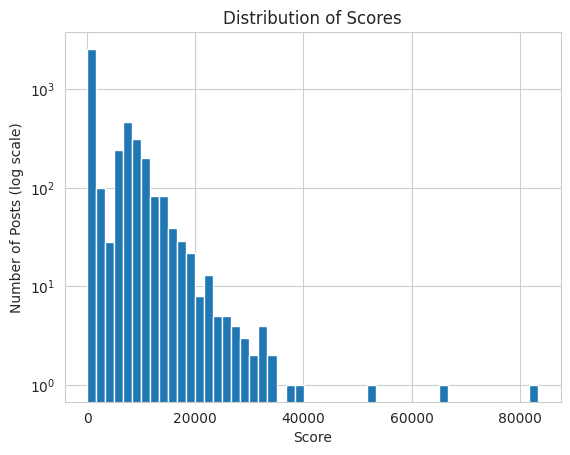

In [69]:
import matplotlib.pyplot as plt

plt.hist(df['score'], bins=50, log=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Number of Posts (log scale)')
plt.show()


Transform the target variable:

In [70]:
import numpy as np

# Add 1 to ensure log(0) is avoided.
train_df['log_score'] = np.log1p(train_df['score'])
val_df['log_score'] = np.log1p(val_df['score'])
test_df['log_score'] = np.log1p(test_df['score'])


Train the model on the transformed target:


In [71]:
# Model building
input_title = Input(shape=(MAX_TITLE_LENGTH,))
input_body = Input(shape=(MAX_BODY_LENGTH,))

embedding_layer = Embedding(VOCAB_SIZE, 100)

title_embedding = embedding_layer(input_title)
body_embedding = embedding_layer(input_body)

lstm_title = LSTM(64)(title_embedding)
lstm_body = LSTM(64)(body_embedding)

concat = tf.keras.layers.concatenate([lstm_title, lstm_body])
dense1 = Dense(64, activation='relu')(concat)
output = Dense(1, activation='linear')(dense1)

model = Model(inputs=[input_title, input_body], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    [train_title_padded, train_body_padded],
    train_df['log_score'],
    validation_data=([val_title_padded, val_body_padded], val_df['log_score']),
    epochs=10,
    batch_size=32
)

Epoch 1/10
92/92 [==============================] - 61s 611ms/step - loss: 16.1897 - mae: 3.5708 - val_loss: 13.2507 - val_mae: 3.4196
Epoch 2/10
92/92 [==============================] - 56s 603ms/step - loss: 13.5376 - mae: 3.4450 - val_loss: 12.9905 - val_mae: 3.3657
Epoch 3/10
92/92 [==============================] - 62s 671ms/step - loss: 13.6069 - mae: 3.4490 - val_loss: 13.0864 - val_mae: 3.3933
Epoch 4/10
92/92 [==============================] - 56s 611ms/step - loss: 13.5209 - mae: 3.4374 - val_loss: 12.9746 - val_mae: 3.3501
Epoch 5/10
92/92 [==============================] - 55s 599ms/step - loss: 13.4859 - mae: 3.4391 - val_loss: 12.9750 - val_mae: 3.3476
Epoch 6/10
92/92 [==============================] - 56s 604ms/step - loss: 13.4907 - mae: 3.4301 - val_loss: 13.4316 - val_mae: 3.4410
Epoch 7/10
92/92 [==============================] - 56s 611ms/step - loss: 13.5216 - mae: 3.4438 - val_loss: 12.9622 - val_mae: 3.3307
Epoch 8/10
92/92 [==============================] - 56s

Evaluate the model

In [72]:
# Evaluate the model on the train set
loss, mae = model.evaluate([train_title_padded, train_body_padded], train_df['log_score'])
print(f"Train MAE: {mae}")
# Evaluate the model on the val set
loss, mae = model.evaluate([val_title_padded, val_body_padded], val_df['log_score'])
print(f"Val MAE: {mae}")
# Evaluate the model on the test set
loss, mae = model.evaluate([test_title_padded, test_body_padded], test_df['log_score'])
print(f"Test MAE: {mae}")

92/92 [==============================] - 12s 132ms/step - loss: 13.1597 - mae: 3.3156
Train MAE: 3.3155786991119385
20/20 [==============================] - 2s 121ms/step - loss: 13.7518 - mae: 3.3881
Val MAE: 3.3881256580352783
20/20 [==============================] - 2s 122ms/step - loss: 13.5905 - mae: 3.3875
Test MAE: 3.3875157833099365


Comparing with the model trained on the original score value.

In [73]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model on the train set
y_pred_log = model.predict([train_title_padded, train_body_padded])
y_pred_score_from_log = np.exp(y_pred_log)
mae_log_model = mean_absolute_error(train_df['score'], y_pred_score_from_log)
print(f"Train MAE: {mae_log_model}")
# Evaluate the model on the val set
y_pred_log = model.predict([val_title_padded, val_body_padded])
y_pred_score_from_log = np.exp(y_pred_log)
mae_log_model = mean_absolute_error(val_df['score'], y_pred_score_from_log)
print(f"Val MAE: {mae_log_model}")
# Evaluate the model on the test set
y_pred_log = model.predict([test_title_padded, test_body_padded])
y_pred_score_from_log = np.exp(y_pred_log)
mae_log_model = mean_absolute_error(test_df['score'], y_pred_score_from_log)
print(f"Test MAE: {mae_log_model}")

92/92 [==============================] - 13s 129ms/step
Train MAE: 3766.439157274034
20/20 [==============================] - 3s 165ms/step
Val MAE: 3428.671655313338
20/20 [==============================] - 2s 118ms/step
Test MAE: 3805.199181050393


### Results comparison
Model trained on score:

Train MAE: 4478.306640625

Val MAE: 4229.20166015625

Test MAE: 4549.0302734375

Model trained on log_score:

Train MAE: 3766.439157274034

Val MAE: 3428.671655313338

Test MAE: 3805.199181050393

Shows that training on log of the score improves the model performance.

#### Other steps I would use if there was more time:

### Parameter tuning:
Ideally there should be more parameter tuning done
* batch size
* Model structure: number of dense layers, dropout probability, layer sizes (embedding length, LSTM, dense layer node counts)
* epoch and early stopping conditions
* Learning rate tuning

### Other techniques for categorical to numerical conversions
* target/label encoding
* frequency encoding

## Data distribution and adjusting for imbalance
* If the score distribution is imbalanced, it'd be nice to balance it by subsampling from highly populated parts or inflating the low populated ones
* If some feature values for example tags, don't have enough samples, we may need to upsample those but there's a risk of overfitting. So, definitely more analysis is needed.

## Adding other attributes
* **Tag** could play a role as we saw correlations between social sciences and score and it could be treated as a categorical variable and embedding or other techniques like Weight of Evidence could be used to make it numeric.
* **Hour** seems to have correlations with score specially combined with tag.
 We could also extract weekday and month from the data and add those as well. Even though these are numerical some preprocessing like normalizing could be used.
* **upvote_ratio** shouldn't be used since it'll cause target leaking as they are both a measure of success and based on the same information source.
* **url** could be used but possibly not that informative (missed to run analysis on it)
* **author** also needs more analysis, possibly we should find popular authors, e.g. more than 5 or 10 samples, and include them as one category and add the rest as one category. Then each category can be converted to numerical values by an encoding or embedding.
